In [1]:
import pandas as pd


In [86]:
data=pd.read_csv('/content/drive/MyDrive/dataset/concrete_data.csv')
df=pd.read_csv('/content/drive/MyDrive/dataset/concrete_data.csv')
data= data. sample(frac=1, axis=0). sample(frac=1).reset_index(drop=True)
df= df.sample(frac=1, axis=0). sample(frac=1).reset_index(drop=True)

# data
df_train = data.sample(frac=0.8, random_state=0)
df_test = data.drop(df_train.index)

In [85]:
train_dataset
test_dataset

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
11,133.1,210.2,0.0,195.7,3.1,949.4,795.3,28,28.94
19,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,14,21.06
23,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,56,39.15
25,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,28,24.85
28,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7,35.75
...,...,...,...,...,...,...,...,...,...
999,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,3,7.32
1003,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28,32.66
1014,387.0,20.0,94.0,157.0,14.3,938.0,845.0,7,36.84
1018,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45


In [50]:

df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [51]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [87]:
X=df_train.columns

pred = df_train[X[X != 'Strength']] # all columns except Strength
tar = df_train['Strength'] # Strength column


In [ ]:
pred.head()
tar.head()

In [88]:
# pred.mean()
pred_norm=(pred-pred.mean())/pred.std()
pred_norm
pred.std()

Cement                103.611331
Blast Furnace Slag     86.144320
Fly Ash                63.840020
Water                  21.617558
Superplasticizer        6.002635
Coarse Aggregate       77.704883
Fine Aggregate         79.700634
Age                    62.214482
dtype: float64

In [89]:
import keras

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
n_cols = pred_norm.shape[1]  # number of predictors
print(n_cols)

8


In [59]:
  # define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,))) #inout layer 
    model.add(Dense(50, activation='relu')) #hidden layer
    model.add(Dense(1)) #o/p layer
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [90]:
model = regression_model()

In [91]:
# fit the model
model.fit(pred_norm, tar, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
18/18 - 0s - loss: 1465.3130 - val_loss: 1457.6160 - 422ms/epoch - 23ms/step
Epoch 2/100
18/18 - 0s - loss: 1365.2035 - val_loss: 1336.5068 - 56ms/epoch - 3ms/step
Epoch 3/100
18/18 - 0s - loss: 1217.4240 - val_loss: 1157.8464 - 58ms/epoch - 3ms/step
Epoch 4/100
18/18 - 0s - loss: 1011.4564 - val_loss: 918.2386 - 56ms/epoch - 3ms/step
Epoch 5/100
18/18 - 0s - loss: 761.6473 - val_loss: 656.4693 - 67ms/epoch - 4ms/step
Epoch 6/100
18/18 - 0s - loss: 512.6335 - val_loss: 438.9855 - 66ms/epoch - 4ms/step
Epoch 7/100
18/18 - 0s - loss: 340.1632 - val_loss: 307.5386 - 56ms/epoch - 3ms/step
Epoch 8/100
18/18 - 0s - loss: 256.8231 - val_loss: 256.1783 - 56ms/epoch - 3ms/step
Epoch 9/100
18/18 - 0s - loss: 227.6272 - val_loss: 234.5533 - 58ms/epoch - 3ms/step
Epoch 10/100
18/18 - 0s - loss: 212.4026 - val_loss: 222.1320 - 66ms/epoch - 4ms/step
Epoch 11/100
18/18 - 0s - loss: 202.6566 - val_loss: 213.1618 - 56ms/epoch - 3ms/step
Epoch 12/100
18/18 - 0s - loss: 194.6478 - val_loss: 2

In [64]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,152.7,144.7,0.0,178.1,8.0,999.7,822.2,28,19.01
1,314.0,145.3,113.2,178.9,8.0,869.1,690.2,28,46.23
2,333.0,0.0,0.0,192.0,0.0,931.2,842.6,3,15.62
3,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,3,20.73
4,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,28,32.72
...,...,...,...,...,...,...,...,...,...
1025,427.5,47.5,0.0,228.0,0.0,932.0,594.0,365,43.70
1026,304.8,0.0,99.6,196.0,9.8,959.4,705.2,28,30.12
1027,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,28,31.12
1028,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7,32.82


In [65]:
dft=(data-data.mean())/data.std()


In [92]:
pred_norm.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [99]:
test=df_test[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']]      
mean=data['Strength'].mean()
std=data['Strength'].std()
y_act=df_test['Strength']
test=(test-test.mean())/test.std()

In [101]:
y_pred=model.predict(test)
y_pred=y_pred.flatten()

11    24.58
19    24.00
23    65.20
25    43.39
28     7.68
Name: Strength, dtype: float64

In [ ]:
y_act=data[50:100]['Strength']
y_act

In [114]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_act, y_pred)

59.519449620775816

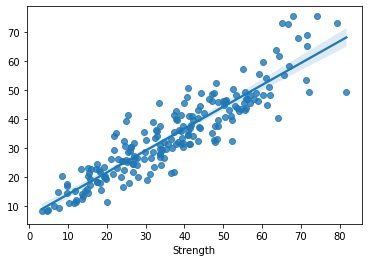

In [115]:
import seaborn as sns
sns. regplot(x=y_act, y=y_pred)